In [100]:
#Scene Segmentation and Interpretation
#Lab1 : linear regression
#Pamir Ghimire, MSCV 2016-2018, UBourgogne

In [101]:
#include some libraries
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy import linalg


In [102]:
#first, a function for visualizing data
def plotData(x, y):
    plt.figure()
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Scatter plot of training data using plotData(x, y)')
    plt.scatter(x, y)

    plt.show()    


In [103]:
#a function for estimating parameters of a linear model y = w0 + w1 x
#reference for linear algebra with numpy:
#https://docs.scipy.org/doc/numpy/reference/routines.linalg.html#solving-equations-and-inverting-matrices

def LinearReg(x, y):
    #A = [1, x]
    A = x
    col0 = np.ones(A.shape[0])
    A = np.column_stack([col0, A])

    #as many parameters as number of columns in A
    w = np.zeros(shape = [A.shape[1], ])

    #estimate parameters using linear least squares
    w = linalg.lstsq(A, y)[0]

    return (w)
    

In [104]:
#function for calculating profit with linear model obtained above
def predictProfit(w, x):
    X = [1, x/10000.00]
    y = np.dot(X, w)
    return(y*10000.00)

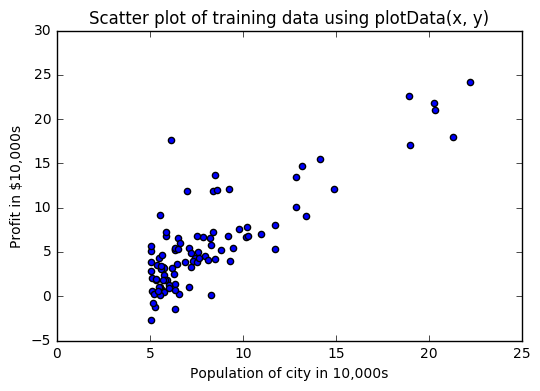

In [105]:
#READ DATA1 FILE AND DISPLAY DATA USING SCATTER PLOT

#read the text file lab1data1.txt
data_mat = np.loadtxt("lab1data1.txt", delimiter= ",")

#unpack the columns into variables x and y
x = data_mat[:,0]
y = data_mat[:,1]

#pass x and y to plotting function for display
plotData(x, y, )


In [106]:
#Use linear regression to find model parameters with the data in data1 file
w = LinearReg(x, y)

#now, make predictions on profit for two populations 
pop1 = 35000
pop2 = 70000

profit1 = predictProfit(w, pop1)
profit2 = predictProfit(w, pop2)

print 'Expected profit for city with 35,000 people = $', profit1
print 'Expected profit for city with 70,000 people = $', profit2

Expected profit for city with 35,000 people = $ 2798.36876352
Expected profit for city with 70,000 people = $ 44554.5463102


In [107]:
#function for normalizing features
def featureNormalize(x):
    #we will return x_normalized
    x_normalized = np.zeros(shape = x.shape)
    
    #as many means and standard deviations as columns
    mu = np.zeros(x.shape[1])
    sigma = np.zeros(x.shape[1])
    
    #for each column of x, xcol
    for col in range(0, x.shape[1]):
        colmean = x[:,col].mean()
        colstd = x[:,col].std()
        
        #normalization: (feature - feature_mean)/feature_std
        x_normalized[:,col] = (x[:,col] - colmean)/colstd
        mu[col] = colmean
        sigma[col] = colstd
        
            
    #return the normalized features
    return x_normalized, mu, sigma

In [108]:
#work on the second dataset (2 features)
#we will assume a linear model : 
#price = w0 + w1 * houseSize + w2 * nBedrooms

housedata = np.loadtxt("lab1data2.txt", delimiter= ",")
variables = housedata[:,0:2]
values = housedata[:,2]

#estimate parameters of linear model without feature normalization
w_woNormalization = LinearReg(variables, values)
print 'parameters from non-normalied features : ', w_woNormalization


#normalize the variables and find parameters
variables_n, mu, sigma = featureNormalize(variables)


#estimate parameters with normalized features
w_wNormalization = LinearReg(variables_n, values)
print 'parameters from normalized-features    : ', w_wNormalization


#Discussion on parameters:
#We find different values of model parameters when we normalize and don't normalize features. 
#  We can notice that after normalization, the second parameter increased in magnitude significantly,
#while the first parameter decreased by more than half. 
#  Hence, when making a prediction with the first model, the bias will be higher (i.e, a greater floor 
#price for the houses). On the other hand, effect of size of house on its price will be greater when 
#using the second model. We may say that the second set of parameters obtained after feature normalization
#has a lower bias. 


parameters from non-normalied features :  [ 89597.9095428     139.21067402  -8738.01911233]
parameters from normalized-features    :  [ 340412.65957447  109447.79646964   -6578.35485416]


In [109]:
#making predictions about house price

#prediction using features from non-normalized model
test_houseSize = 1650
test_nbedrooms = 3
testHouse = np.column_stack([1.0, test_houseSize, test_nbedrooms])
testHousePrice = np.dot(testHouse, w_woNormalization)

print 'price of test house using feature non-normalized model = $', testHousePrice

#normalize test data
test_houseSize_n = (test_houseSize - mu[0])/sigma[0]
test_nbedrooms_n = (test_nbedrooms - mu[1])/sigma[1]
testHouse_n = np.column_stack([1.0, test_houseSize_n, test_nbedrooms_n])
testHousePrice_n = np.dot(testHouse_n, w_wNormalization)

print 'price of test house using feature normalized model = $', testHousePrice_n

#We find the same predictions with feature normalized and feature non-normalized models!

price of test house using feature non-normalized model = $ [ 293081.4643349]
price of test house using feature normalized model = $ [ 293081.4643349]


In [110]:
#function for gradient descent
def gradientDescent(x, y, w, alpha, Niter):
    #augment the data matrix x to include a column of 1's
    x_a = np.column_stack([np.ones(shape = x.shape[0],), x])
    
    #initialize a cost vector
    cost = np.zeros(Niter)
    
    iterCounter = 0;
    #for the stated number of iterations
    while (iterCounter < Niter):
        #estimate the cost function for current parameters w
        cost[iterCounter] = (0.50/x_a.shape[0])*np.sum( np.square(np.dot(x_a, w) - y) )
        
        #for each parameter w
        for i in range(0, len(w)):
            #estimate gradient
            delWi = (1.0/ x_a.shape[0]) * np.sum ( np.multiply( (np.dot(x_a, w) - y), x_a[:,i] ) )
            #upgrade using estimated gradient
            w[i] = w[i] - alpha*delWi
    
    
        #increment the iterCounter
        iterCounter = iterCounter + 1
    
    #return the parameters and the evolution of costs over iterations
    return w, cost

Price of house estimated with normalized features and parameters from gradient descent = $ [ 293081.46640299]
For comparison: previously estimated price with normalized features = $  [ 293081.4643349]


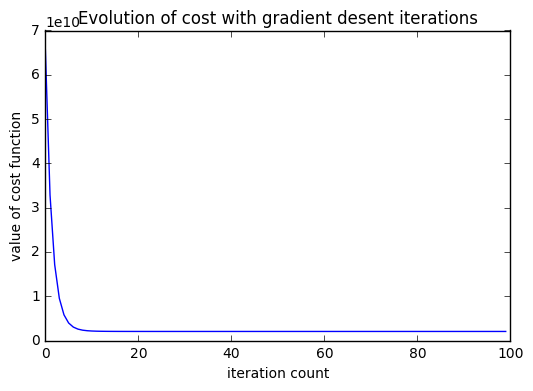

In [111]:
alpha = 0.3
nIter = 100
w_nGraDescent, cost = gradientDescent(variables_n, values, [0.0,0.0,0.0], alpha, nIter)

#estimate price of house with normalized features (same as those computed before)
testHousePrice_nGraDescent = np.dot(testHouse_n, w_nGraDescent)

print 'Price of house estimated with normalized features and parameters from gradient descent = $', testHousePrice_nGraDescent
print 'For comparison: previously estimated price with normalized features = $ ', testHousePrice_n
plt.plot(range(0, nIter), cost)
plt.xlabel('iteration count')
plt.ylabel('value of cost function')
plt.title('Evolution of cost with gradient desent iterations')
plt.show()

